### Student Activity: Returns Over Date Ranges

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for specified date ranges.


In [45]:
# Import libraries and dependencies
import pandas as pd
%matplotlib inline

### Read CSV in as DataFrame

In [46]:
# Set the path
#no need to set path when you read direct from the file not path file ;)

# Read in the CSV as a DataFrame
amd_csv_data = pd.read_csv("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/03-Python-Pandas/2/Activities/11-Stu_Returns/Resources/amd_stock_data.csv")
amd_csv_data.head()

,date,close,volume,open,high,low
0,4/29/09,3.51,11537950,3.40,3.56,3.38
1,4/30/09,3.61,18193730,3.55,3.73,3.53
2,5/1/09,3.82,16233940,3.55,3.90,3.55
3,5/4/09,4.26,21236940,3.90,4.30,3.83
4,5/5/09,4.32,16369170,4.36,4.39,4.11


### View Summary Statistics

In [47]:
# Output summary statistics for csv data
amd_csv_data.describe(include="all")

,date,close,volume,open,high,low
count,2517,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
unique,2517,NaN,NaN,NaN,NaN,NaN
top,4/29/09,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.561573,3.535586e+07,7.564402,7.727118,7.393507
std,NaN,5.814291,3.357519e+07,5.816548,5.961393,5.660075
min,NaN,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,NaN,3.610000,1.467149e+07,3.615000,3.680000,3.540000
50%,NaN,5.950000,2.372014e+07,5.930000,6.090000,5.790000
75%,NaN,9.450000,4.286763e+07,9.450000,9.590000,9.260000


### Drop Extra Columns


In [48]:
# Drop unnecessary columns
amd_csv_data.drop(columns=["volume", "open", "high", "low"], inplace=True)
amd_csv_data

,date,close
0,4/29/09,3.51
1,4/30/09,3.61
2,5/1/09,3.82
3,5/4/09,4.26
4,5/5/09,4.32
...,...,...
2512,4/23/19,27.97
2513,4/24/19,28.46
2514,4/25/19,27.66
2515,4/26/19,27.88


### Set Date as Index


In [49]:
# Set the date as the index to the DataFrame

amd_csv_data.set_index(pd.to_datetime(amd_csv_data["date"], infer_datetime_format=True), inplace=True)
amd_csv_data.head()

,date,close
date,,
2009-04-29,4/29/09,3.51
2009-04-30,4/30/09,3.61
2009-05-01,5/1/09,3.82
2009-05-04,5/4/09,4.26
2009-05-05,5/5/09,4.32


### Drop Extra Date Column

In [50]:
# Drop the extra date column
amd_csv_data=amd_csv_data.drop(columns=["date"])
amd_csv_data.head()

,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32


### Calculate Daily Returns


In [51]:
# Calculate the daily return over the last 10 years
daily_return = amd_csv_data.pct_change()
daily_return.head()

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085


### Use Indexing to Create Date Ranges


In [52]:
# Slice DataFrame into 1 year timeframe
daily_return_1year = daily_return.loc["2018-04-30" : "2019-04-29"]
daily_return_1year
# Slice DataFrame into 3 year timeframe
daily_return_3year = daily_return.loc["2016-04-30" : "2019-04-29"]
daily_return_3year
# Slice DataFrame into 5 year timeframe
daily_return_5year = daily_return.loc["2015-04-30" : "2019-04-29"]
daily_return_5year
# Slice DataFrame into 10 year timeframe
daily_return_10year = daily_return.loc["2009-04-30" : "2019-04-29"]
daily_return_10year

,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Output Summary Statistics for 1 Year of Daily Returns 


In [53]:
# Display summary statistics for 1 year of AMD stock data
daily_return_1year.describe(include="all")
daily_return_1year

,close
date,
2018-04-30,-0.020702
2018-05-01,0.022978
2018-05-02,-0.014376
2018-05-03,-0.003646
2018-05-04,0.032022
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Output Summary Statistics for 3 Years of Daily Returns 


In [54]:
# Display summary statistics for 3 years of AMD stock data
daily_return_3year.describe(include="all")
daily_return_3year

,close
date,
2016-05-02,0.053521
2016-05-03,-0.037433
2016-05-04,0.000000
2016-05-05,0.016667
2016-05-06,0.005464
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Output Summary Statistics for 5 Years of Daily Returns

In [55]:
# Display summary statistics for 5 years of AMD stock data
daily_return_5year.describe(include="all")
daily_return_5year

,close
date,
2015-04-30,-0.008772
2015-05-01,0.022124
2015-05-04,0.000000
2015-05-05,-0.012987
2015-05-06,0.004386
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Output Summary Statistics for 10 Years of Daily Returns 

In [56]:
# Display summary statistics for 10 years of AMD stock data
daily_return_10year.describe(include="all")
daily_return_10year

,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Plot 1 Year of Daily Returns 

<AxesSubplot:xlabel='date'>

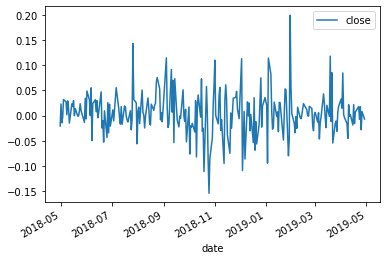

In [61]:
# Display chart of 1 year's worth of daily AMD returns
daily_return_1year.plot()

### Plot 3 Years of Daily Returns

<AxesSubplot:xlabel='date'>

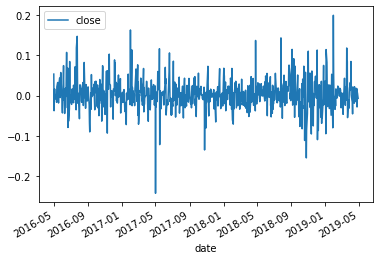

In [62]:
# Display chart of 3 year's worth of daily AMD returns
daily_return_3year.plot()

### Plot 5 Years of Daily Returns

<AxesSubplot:xlabel='date'>

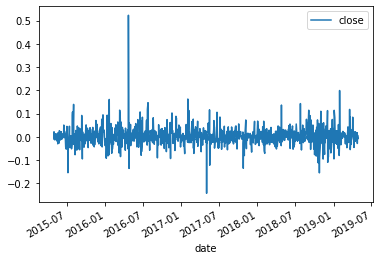

In [63]:
# Display chart of 5 year's worth of daily AMD returns
daily_return_5year.plot()

### Plot 10 Years of Daily Returns

<AxesSubplot:xlabel='date'>

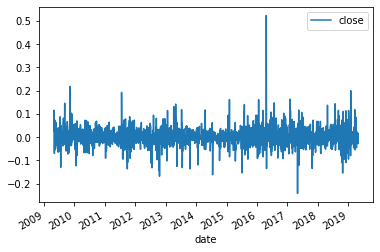

In [64]:
# Display chart of 10 year's worth of daily AMD returns
daily_return_10year.plot()

### Analyze Daily Returns over Date Ranges

1. What are the average daily returns over each date range?

    * 1 Year = 
    * 3 Year = 
    * 5 Year = 
    * 10 Year = 
    
    
2. What insights could this provide in regards to wanting to trade AMD stock in the long-term vs. short-term? 

